# XID+PACS NGP Prior

In [1]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table , join
from mocpy import MOC
from astropy.io import fits
from astropy import wcs

/home/mc741/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
import seaborn as sns

This notebook uses all the raw data from the XID+PACS catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. As the prior for XID+ is based on IRAC detected sources.

In [11]:
#Sel_func=pymoc.MOC()
#Sel_func.read('../../dmu4/dmu4_sm_NGP/data/holes_NGP_ukidss_k_O16_20190204_MOC.fits')

#filename='../../dmu18/dmu18_HELP-PACS-maps/data/NGP_PACS100_v0.9.fits'
#hdulist = fits.open(filename)
#im100phdu=hdulist['IMAGE'].header
#ngp_moc=MOC.from_image(im100phdu,13, ~np.isnan(hdulist['IMAGE'].data))
#ngp_moc.write('./data/ngp_moc.fits')



#im_moc=pymoc.MOC()
#im_moc.read('./data/ngp_moc.fits')

#Final=Sel_func.intersection(im_moc)

MemoryError: 

In [ ]:
#Final.write('./data/testMoc.fits', overwrite=True)
#Final=pymoc.MOC()
#Final.read('./data/testMoc.fits')

In [3]:
Sel_func=pymoc.MOC()
Sel_func.read('../../dmu4/dmu4_sm_NGP/data/holes_NGP_ukidss_k_O16_20190204_MOC.fits')


## Read in CIGALE predictions catalogue

In [4]:
cigale=Table.read('../../dmu28/dmu28_NGP/data/NGP_results_Ldust_prediction.fits')


In [5]:
cigale['id'].name = 'help_id'

In [6]:
cigale

help_id,bayes.dust.luminosity,bayes.dust.luminosity_err,best.chi_square,best.reduced_chi_square
bytes27,float64,float64,float64,float64
HELP_J124043.436+340454.964,2.6255726460825376e+38,2.3341106226548585e+38,13.6758146750549,1.9536878107221285
HELP_J124044.261+340515.932,4.454774001790711e+36,1.1836721760690504e+36,40.1312554377252,5.01640692971565
HELP_J124044.423+340508.303,7.425850359374088e+38,8.50041825482934e+38,1.997400689108806,0.3329001148514677
HELP_J124047.274+340554.983,1.4016155289703243e+38,1.4433711696275098e+38,36.513319610044825,5.216188515720689
HELP_J124047.353+340507.994,3.6873140591071903e+37,2.5681660957952962e+37,36.02051777349351,4.502564721686689
HELP_J124048.661+340635.189,2.3995085208439427e+35,1.1545619603215568e+35,84.95623366011355,10.619529207514194
HELP_J124049.481+340533.486,1.03643281738859e+37,3.722264512058079e+36,268.4185900808973,33.55232376011216
HELP_J124049.705+340627.843,8.703772920561137e+36,7.527415818915938e+36,179.84914554202115,25.692735077431593
HELP_J124050.462+340830.858,5.183459585477802e+38,5.7490736768374256e+38,7.275370250021841,1.0393386071459774


## Read in photoz

In [7]:
photoz=Table.read('../../dmu24/dmu24_NGP/data/master_catalogue_ngp_20180501_photoz_20180601_r_optimised.fits')

In [8]:
photoz

help_id,RA,DEC,id,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,za_hb,chi_r_eazy,chi_r_atlas,chi_r_cosmos,chi_r_stellar,stellar_type
bytes27,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6
HELP_J131410.500+302813.489,198.54375042943158,30.47041372674147,2020994,0.1631,0.1017,0.2345,0.784,-99.0,-99.0,-99.0,-99.0,0.15233281491278122,0.162043,0.4889565,0.74402625,0.10714735,rg5iii
HELP_J133855.810+281107.598,204.73254078095655,28.18544379782179,2020995,0.7177,0.2645,1.1746,0.798,-99.0,-99.0,-99.0,-99.0,0.7266483072093366,0.096690075,0.40835875,0.058110825,1.23097825,m0iii
HELP_J130324.552+285933.902,195.85230149733783,28.99275044788535,2020996,0.5396,0.1697,0.9004,0.796,-99.0,-99.0,-99.0,-99.0,0.5782503582578263,0.012402935,0.0416054,0.61970925,0.6092085,g5ii
HELP_J125051.674+284236.699,192.71530874422427,28.710194027938023,2020997,0.6721,0.3466,1.0359,0.786,1.0625,1.0543,1.0728,0.005,0.6165284812310255,0.25206375,0.2741105,0.2977545,1.9183805,m3v
HELP_J133040.559+290320.044,202.66899411411032,29.055567760898036,2020998,0.622,0.2721,0.9996,0.753,0.217,0.1803,0.2532,0.044,0.606872782679902,0.0116719175,0.03691225,0.1725548,0.57439175,rf8v
HELP_J125342.104+271050.555,193.42543477062267,27.18070960590991,2020999,0.6738,0.2457,1.1167,0.795,-99.0,-99.0,-99.0,-99.0,0.8387533654647497,0.041452575,0.0949765,0.071398625,3.30642,m2p5v
HELP_J130655.638+304710.237,196.7318269709398,30.78617683330146,2021000,0.4578,0.115,0.8609,0.797,-99.0,-99.0,-99.0,-99.0,0.37509586981766757,1.94464675,4.1566,3.7360075,5.64026,a3iii
HELP_J132321.501+264200.206,200.83958711978946,26.700057193650885,2021001,0.191,0.1352,0.2419,0.789,-99.0,-99.0,-99.0,-99.0,0.19093536712258813,0.330772,0.031593175,0.011386015,0.71356825,rk4iii
HELP_J130554.319+305415.277,196.4763310378609,30.904243743657744,2021002,0.4068,0.1697,0.6458,0.799,-99.0,-99.0,-99.0,-99.0,0.38335882089940193,0.59804725,0.215782625,0.4299075,0.5903925,rk3iii


## Join CIGALE and photoz tables

In [9]:
prior=join(cigale,photoz,keys='help_id')

In [10]:
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
f_pred=prior['bayes.dust.luminosity']/(4*np.pi*cosmo.luminosity_distance(prior['z1_median']).to(u.cm))


In [11]:
prior=prior[np.isfinite(f_pred.value)][np.log10(f_pred.value[np.isfinite(f_pred.value)])>8.5]

In [12]:
prior['DEC'].name='Dec'

## Read in Maps

In [13]:
im100fits='../../dmu18/dmu18_HELP-PACS-maps/data/NGP_PACS100_v0.9.fits'
im160fits='../../dmu18/dmu18_HELP-PACS-maps/data/NGP_PACS160_v0.9.fits'
#output folder
output_folder='./'

In [14]:
from astropy.io import fits
from astropy import wcs


#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist['PRIMARY'].header
im100hdu=hdulist['IMAGE'].header
im100=hdulist['IMAGE'].data
w_100 = wcs.WCS(hdulist['IMAGE'].header)
pixsize100=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim100=hdulist['ERROR'].data

hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist['PRIMARY'].header
im160hdu=hdulist['IMAGE'].header
im160=hdulist['IMAGE'].data
w_160 = wcs.WCS(hdulist['IMAGE'].header)
pixsize160=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim160=hdulist['ERROR'].data

hdulist.close()


## Read in PSF

In [21]:
pacs100_psf=fits.open('../../dmu18/dmu18_NGP/data/dmu18_PACS_100_PSF_NGP_20190125.fits')
pacs160_psf=fits.open('../../dmu18/dmu18_NGP/data/dmu18_PACS_160_PSF_NGP_20190125.fits')

centre100=np.long((pacs100_psf[0].header['NAXIS1']-1)/2)
radius100=10
centre160=np.long((pacs160_psf[0].header['NAXIS1']-1)/2)
radius160=10

pind100=np.arange(0,radius100+1+radius100,1)*3600*np.abs(pacs100_psf[0].header['CDELT1'])/pixsize100 #get 100 scale in terms of pixel scale of map
pind160=np.arange(0,radius160+1+radius160,1)*3600*np.abs(pacs160_psf[0].header['CDELT1'])/pixsize160 #get 160 scale in terms of pixel scale of map

In [22]:
print(pind100)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


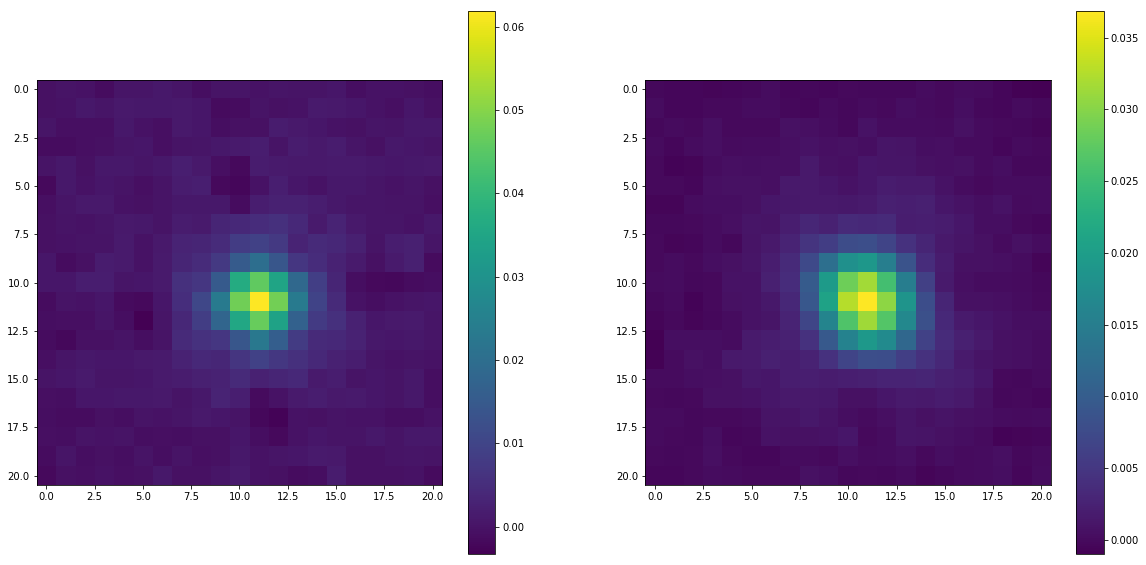

In [23]:
import pylab as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(pacs100_psf[0].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(pacs160_psf[0].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1])
plt.colorbar()

## Set XID+ prior class

In [26]:
#---prior100--------
prior100=xidplus.prior(im100,nim100,im100phdu,im100hdu, moc=Sel_func)#Initialise with map, uncertianty map, wcs info and primary header
prior100.prior_cat(prior['RA'] ,prior['Dec'] ,'NGP_results_Ldust_prediction.fits',ID=prior['help_id'])#Set input catalogue
prior100.prior_bkg(0.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)

#---prior160--------
prior160=xidplus.prior(im160,nim160,im160phdu,im160hdu, moc=Sel_func)
prior160.prior_cat(prior['RA'] ,prior['Dec'] ,'NGP_results_Ldust_prediction.fits',ID=prior['help_id'])
prior160.prior_bkg(0.0,5)

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]


MemoryError: 

In [16]:
# Divide by 1000 so that units are mJy
prior100.set_prf(pacs100_psf[0].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1]/1000.0,
                pind100,pind100)
prior160.set_prf(pacs160_psf[0].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1]/1000.0,
                pind160,pind160)

In [ ]:
xidplus.plot_map([prior100])

In [17]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=11
tiles=moc_routines.get_HEALPix_pixels(order,prior100.sra,prior100.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior100.sra,prior100.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./data/'
xidplus.io.pickle_dump({'priors':[prior100,prior160],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},'Master_prior.pkl')
outfile=output_folder+'Tiles.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()

----- There are 2165 tiles required for input catalogue and 18 large tiles
writing total_bytes=781068219...
writing bytes [0, 781068219)... done.


SystemExit: 

In [18]:
ls -ltrh

total 1525656
drwxr-xr-x@ 3 pdh21  pdh21   102B 14 Feb 16:33 data/
-rw-rw-r--  1 pdh21  pdh21    41K 15 Feb 11:16 XID+PACS_prior.ipynb
-rw-rw-r--  1 pdh21  pdh21    18K 15 Feb 11:25 Tiles.pkl
-rw-rw-r--  1 pdh21  pdh21   745M 15 Feb 11:25 Master_prior.pkl
